In [1]:
import numpy as np
import pandas as pd
import sys
import os
code = os.path.abspath('../')
sys.path.append(code)
from src.utils import collect_region_stats_paths
import matplotlib.pyplot as plt
from src.analysis import *
from sklearn.linear_model import LinearRegression

In [4]:
base_path = '/nrs/spruston/Boaz/I2'
meta = pd.read_excel(os.path.join(code, 'logs','metadata.xlsx'), 'Metadata', index_col=0)
csv_paths = collect_region_stats_paths(base_path)
region_data = load_region_data(csv_paths)
meta

/groups/spruston/home/moharb/mambaforge/envs/pyants/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Cage,AnimalID,Genotype,Pulse,Chase,sex,DOB,Perfusion,Path,Age,Interval,Group,Comment
Number,,,,,,,,,,,,,
2,215258,549057,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-03,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,6.400000,0,Zero,Zero day iDISCO
3,216141,550749,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
5,216141,550751,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
6,216314,551089,GluA2-HaloTag line1,Skipped,JFX673,female,2024-04-02,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.400000,0,Zero,Zero day iDISCO
7,218600,555600,PSD95-HaloTag,JFX673,JF552,male,2024-06-03,2024-08-28,/nrs/spruston/Boaz/I2/2024-09-09_Compare_iDISC...,2.866667,2,Control,"Problem with Pulse, test for iDISCO"


## JF552

In [27]:
columns = ['Region','mean_ch0', 'mean_ch1', 'mean_ch2']
filters = {
    'Group': ['Zero'],  # Include only animals from the 'Zero' group
    'Chase': ['JF552']   # Include only female animals
}
meta_columns = ['AnimalID']

In [28]:
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
pivoted_df = unified_df.pivot(index='Region', columns='AnimalID', values=['mean_ch0', 'mean_ch1', 'mean_ch2'])


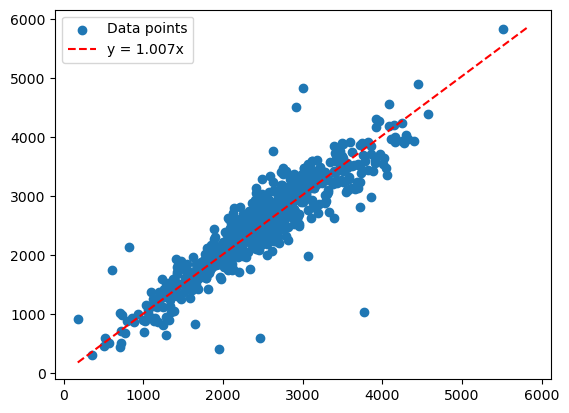

In [38]:
x = pivoted_df['mean_ch0'].iloc[:, 0]  # First column
y = pivoted_df['mean_ch0'].iloc[:, 1]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.3f}x ')

plt.legend()

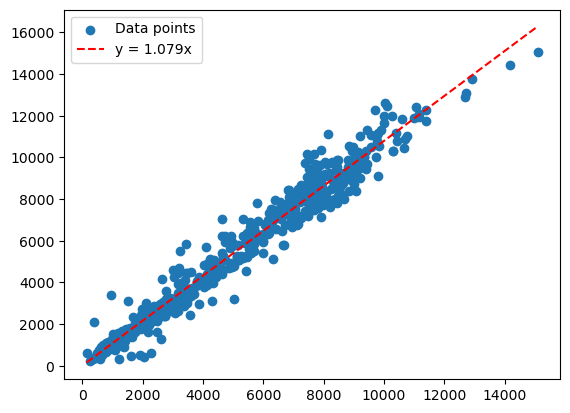

In [39]:
x = pivoted_df['mean_ch1'].iloc[:, 0]  # First column
y = pivoted_df['mean_ch1'].iloc[:, 1]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False, )
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.3f}x ')

plt.legend()

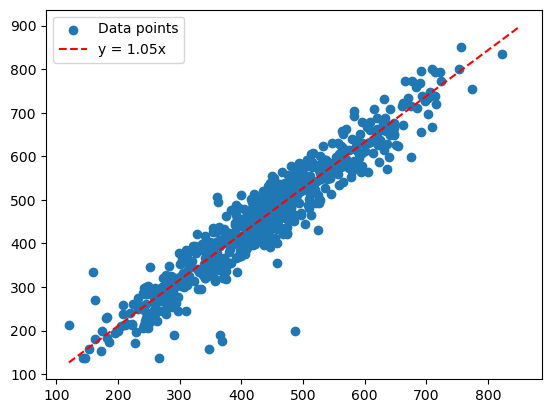

In [40]:
x = pivoted_df['mean_ch2'].iloc[:, 0]  # First column
y = pivoted_df['mean_ch2'].iloc[:, 1]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.2f}x ')

plt.legend()

In [41]:
columns = ['Region','mean_ch0', 'mean_ch1', 'mean_ch2']
filters = {
    'Group': ['Zero'],  # Include only animals from the 'Zero' group
    'Chase': ['JFX673']   # Include only female animals
}
meta_columns = ['AnimalID']
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
pivoted_df = unified_df.pivot(index='Region', columns='AnimalID', values=['mean_ch0', 'mean_ch1', 'mean_ch2'])


In [42]:
pivoted_df

mean_ch0                  mean_ch1                  mean_ch2  \
AnimalID        550751       551089       550751       551089       550751   
Region                                                                       
1          1155.406370  1324.646365   553.785722   605.867599  1924.899627   
2          2744.493007  2567.491361  1451.644651  1303.450925  2639.169324   
6          1730.547965  1718.541011  1104.980058  1051.323832   731.109178   
7          2178.797750  1964.218663  1138.159519   956.860366   994.455866   
9          3632.802899  3780.560226  1774.924450  1695.795463  4602.336943   
...                ...          ...          ...          ...          ...   
607344850  2467.225288  2817.898146  1330.046793  1574.744769  1731.305437   
607344854  2517.594442  2586.329785  1455.369900  1450.364657  1814.169795   
607344858  2723.735232  2896.772416  1547.396361  1638.306540  1785.732358   
607344862  2449.965870  2470.179721  1350.546451  1396.931949  1901.461518   
614454277  3346.935648  3515.349758  1983.966090  1921.755818  1519.447022   

                        
AnimalID        551089  
Region                  
1          2111.123160  
2          2625.309118  
6           795.724093  
7          1019.655073  
9          4811.012262  
...                ...  
607344850  2013.368861  
607344854  1954.806922  
607344858  2002.959731  
607344862  1909.728950  
614454277  1633.200798  

[687 rows x 6 columns]

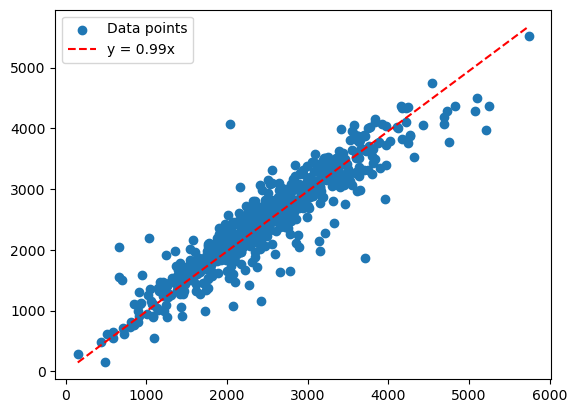

In [43]:
x = pivoted_df['mean_ch0'].iloc[:, 0]  # First column
y = pivoted_df['mean_ch0'].iloc[:, 1]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.2f}x ')

plt.legend()

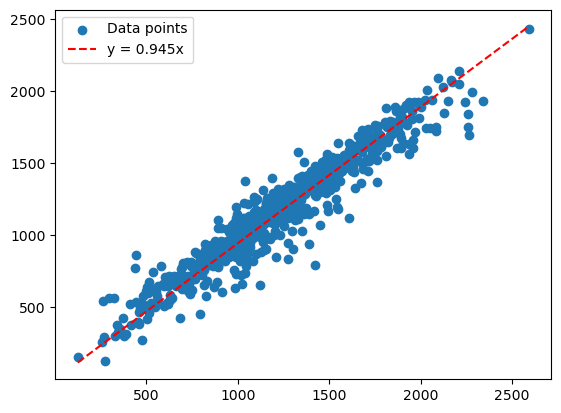

In [44]:
x = pivoted_df['mean_ch1'].iloc[:, 0]  # First column
y = pivoted_df['mean_ch1'].iloc[:, 1]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.3f}x ')

plt.legend()

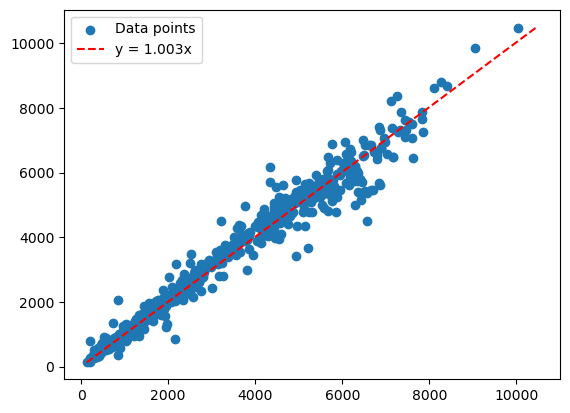

In [45]:
x = pivoted_df['mean_ch2'].iloc[:, 0]  # First column
y = pivoted_df['mean_ch2'].iloc[:, 1]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.3f}x ')
plt.box('off')
plt.legend()